# Importing Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def apply_sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    return np.uint8(sobel)

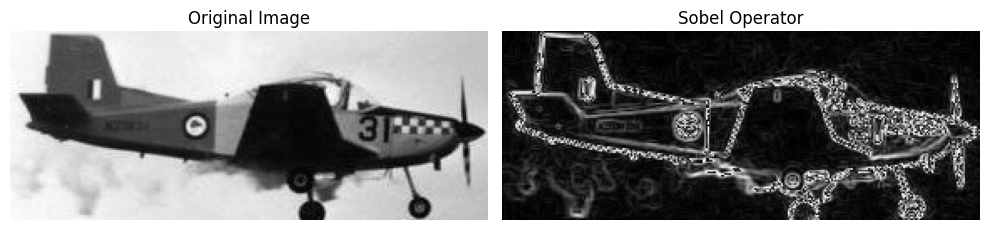

In [ ]:
img_path = "natural_images/airplane/airplane_0001.jpg"
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
sobel = apply_sobel_filter(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Operator")
plt.axis('off')

plt.tight_layout()
plt.show()

# Applying Sobel filter

In [ ]:
root_dir = "natural_images"
input_dir = "natural_images_resized"
output_dir = "sobel_images"
os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)
folders=["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]

In [ ]:
image_num = 0
for folder in folders:
    for i, file in enumerate(os.listdir(os.path.join(root_dir, folder))):
        img_path = os.path.join(root_dir, folder, file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # resize the image to 256x256
        resized_image = cv2.resize(image, (256, 256))
        # save the resized image
        input_path = f"./{input_dir}/image_{image_num:04d}.jpg"
        cv2.imwrite(input_path, resized_image)
        # apply sobel
        sobel = apply_sobel_filter(resized_image)
        # save the sobel image
        output_path = f"./{output_dir}/sobel_{image_num:04d}.jpg"
        cv2.imwrite(output_path, sobel)
        print(f"Saved {output_path}")
        image_num += 1


Saved ./sobel_images/sobel_0000.jpg
Saved ./sobel_images/sobel_0001.jpg
Saved ./sobel_images/sobel_0002.jpg
Saved ./sobel_images/sobel_0003.jpg
Saved ./sobel_images/sobel_0004.jpg
Saved ./sobel_images/sobel_0005.jpg
Saved ./sobel_images/sobel_0006.jpg
Saved ./sobel_images/sobel_0007.jpg
Saved ./sobel_images/sobel_0008.jpg
Saved ./sobel_images/sobel_0009.jpg
Saved ./sobel_images/sobel_0010.jpg
Saved ./sobel_images/sobel_0011.jpg
Saved ./sobel_images/sobel_0012.jpg
Saved ./sobel_images/sobel_0013.jpg
Saved ./sobel_images/sobel_0014.jpg
Saved ./sobel_images/sobel_0015.jpg
Saved ./sobel_images/sobel_0016.jpg
Saved ./sobel_images/sobel_0017.jpg
Saved ./sobel_images/sobel_0018.jpg
Saved ./sobel_images/sobel_0019.jpg
Saved ./sobel_images/sobel_0020.jpg
Saved ./sobel_images/sobel_0021.jpg
Saved ./sobel_images/sobel_0022.jpg
Saved ./sobel_images/sobel_0023.jpg
Saved ./sobel_images/sobel_0024.jpg
Saved ./sobel_images/sobel_0025.jpg
Saved ./sobel_images/sobel_0026.jpg
Saved ./sobel_images/sobel_0

In [ ]:
print(image_num)

6899


In [ ]:
# load all input and target images
input_images = []
output_images = []

for i in range(6899):
    input_path = f"./{input_dir}/image_{i:04d}.jpg"
    output_path = f"./{output_dir}/sobel_{i:04d}.jpg"
    input_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    output_image = cv2.imread(output_path, cv2.IMREAD_GRAYSCALE)
    input_images.append(input_image)
    output_images.append(output_image)

input_images = np.array(input_images)
output_images = np.array(output_images)

print(input_images.shape)
print(output_images.shape)

(6899, 256, 256)
(6899, 256, 256)


# Saving the datasets

In [ ]:
# save all the numpy arrays
os.makedirs("Saved_Datasets", exist_ok=True)

np.save("Saved_Datasets/input_images.npy", input_images)
np.save("Saved_Datasets/output_images.npy", output_images)

# split the data into training and test sets and save them
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_images, output_images, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

np.save("Saved_Datasets/X_train.npy", X_train)
np.save("Saved_Datasets/X_test.npy", X_test)
np.save("Saved_Datasets/y_train.npy", y_train)
np.save("Saved_Datasets/y_test.npy", y_test)


(5519, 256, 256) (1380, 256, 256) (5519, 256, 256) (1380, 256, 256)
